# 1. Creating a Clean Chart

### Begin by importing the packages we'll use.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pyl

# This is an example of an iPython magic command.
# If we don't use this, then we can't see our matplotlib plots in our notebook
%matplotlib inline

> __Data looks better naked__

What in the world does that mean?

* Slide and data presentation often refers back to Edward Tufte and his book __"The Visual Display of Quantitative Information."__
   
* Define naked data this way:

>__Data-ink is the non-erasable core of the graphic, the non-redundant ink arranged in response to variation in the numbers represented__

* If we remove all non-data-ink and redundant data-ink, within reason, we should be left with an informative graphic that reflects sound graphical design


> __“Perfection is achieved not when there is nothing more to add, but when there is nothing left to take away”__

– *Antoine de Saint-Exupery*

### Build plots using simple data...

#### Load our data first
* For this exercise, we'll use a simple dataset: letter frequency in the English language.

In [2]:
dfLetterFrequency = pd.read_csv('../data/letter_frequency.csv', header=None, index_col=0, names=['Frequency'])

### The simple `pandas` bar plot is sufficient for exploration...

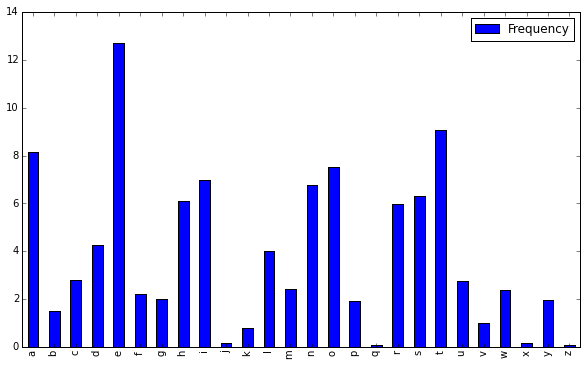

In [29]:
dfLetterFrequency.plot(kind='bar', figsize=(10,6))

### But if we're showing this to the world, we can do better.

### Let's make this chart prettier...

#### We need a color palette
* These are the "Tableau 20" colors as RGB.  

In [ ]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  
  

* Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  

In [ ]:
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  

In [ ]:
N = 26
ind = np.arange(N)  # the x locations for the groups
width = 0.8       # the width of the bars

### You typically want your plot to be ~1.33x wider than tall.
* Common sizes: (10, 7.5) and (12, 9)  

In [ ]:
pyl.figure(figsize=(12, 9))  

### Remove the plot frame lines. They are unnecessary chartjunk.  

In [ ]:
ax = pyl.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)  

### Ensure that the axis ticks only show up on the bottom and left of the plot.  
* Ticks on the right and top of the plot are generally unnecessary chartjunk.  

In [ ]:
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  

### Set the labels

In [ ]:
ax.set_xticks(ind + 0.5 * width)
ax.set_xticklabels(dfLetterFrequency.index.values)

### Limit the range of the plot to only where the data is.  
* Avoid unnecessary whitespace.  

In [ ]:
pyl.ylim(0, 14)
pyl.xlim(0,26)

### Make sure your axis ticks are large enough to be easily read.  
* You don't want your viewers squinting to read your plot.  

In [ ]:
pyl.yticks(range(0, 14, 2), [str(x) + "%" for x in range(0, 14, 2)], fontsize=14)  
pyl.xticks(fontsize=14)  

### Provide tick lines across the plot to help your viewers trace along the axis ticks. 
* Make sure that the lines are light and small so they don't obscure the primary data lines.  

In [ ]:
for y in range(0, 14, 2):  
    plt.plot(range(0, 26), [y] * len(range(0, 26)), ":", lw=0.5, color="black", alpha=0.3)

### Remove the tick marks.
* They are unnecessary with the tick lines we just plotted.  

In [ ]:
plt.tick_params(axis="both", which="both", bottom="off", top="off",  
                labelbottom="on", left="off", right="off", labelleft="on")  

### Now that the plot is prepared, it's time to actually plot the data!

In [ ]:
plt.bar(ind, dfLetterFrequency.Frequency.values, width, color=tableau20[0], alpha=0.5)          

### matplotlib's title() call centers the title on the plot, but not the graph,  
* I used the text() call to customize where the title goes.  
* Make the title big enough so it spans the entire plot, but don't make it so big that it requires two lines to show.  
  
* Note that if the title is descriptive enough, it is unnecessary to include axis labels. 
    * They are self-evident, in this plot's case.  

In [ ]:
pyl.text(6, 13.5, "Letter Frequency in English Writing", fontsize=17, ha="center")  

  
### Always include your data source(s) and copyright notice! 
* And for your data sources, tell your viewers exactly where the data came from,  
* __preferably with a direct link to the data__. 
* Just telling your viewers that you used data from the "U.S. Census Bureau" is completely useless:  
    * The U.S. Census Bureau provides all kinds of data.
    * How are your viewers supposed to know which data set you used?  

In [ ]:
pyl.text(0, -1, "Data source: Cryptological Mathematics, Robert Lewand.", fontsize=10)    

### Finally, save the figure as a PNG.  
* You can also save it as a PDF, JPEG, etc.  
* Just change the file extension in this call.  
* `bbox_inches="tight"` removes all the extra whitespace on the edges of your plot.  

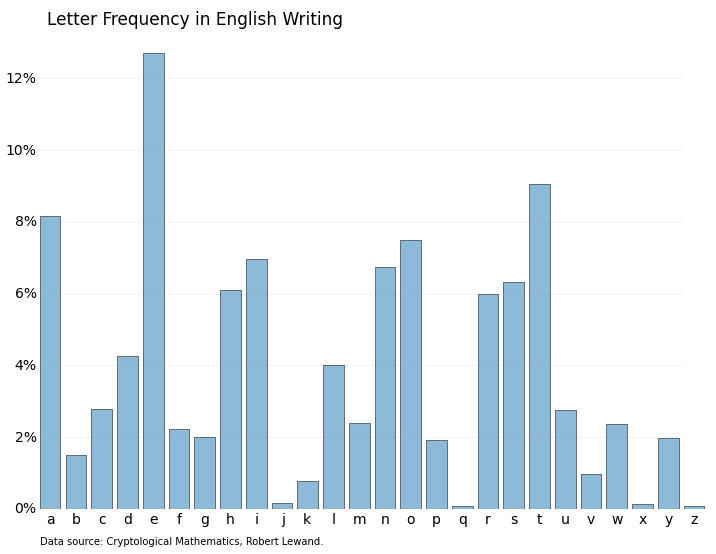

In [28]:
savefig("../outputs/letter_frequency.png", bbox_inches="tight");
dataviz = plt.gcf()